 # Robust Embeddings

## Validation curves

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

In [63]:
ROLASER_MODELS = ["roberta-maxpool", "roberta-maxpool-init", "roberta-meanpool", "roberta-meanpool-init"]
C_ROLASER_MODELS = ["c-roberta-maxpool", "c-roberta-maxpool-init", "c-roberta-meanpool", "c-roberta-meanpool-init"]

In [64]:
COLUMNS = ["loss_std_gold", "loss_ugc_gold", "valid_distil_loss"]

In [123]:
input_dir = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_034_jz/scores"
all_scores = pd.read_csv(os.path.join(input_dir, "all_scores.csv")).sort_values(by="steps")

In [124]:
all_scores["model"].unique().size

2

In [125]:
x_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter.set_powerlimits((-4, -4))  # Set the exponent range to (-4, -4)
x_formatter.set_powerlimits((5, 5))  # Set the exponent range to (5, 5)


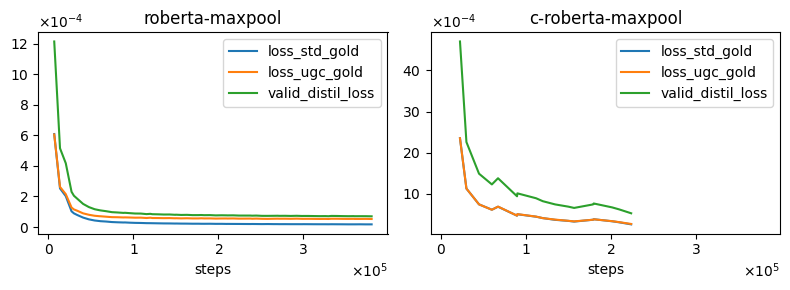

In [126]:
models = all_scores["model"].unique()

n_rows = models.size//2
n_cols = min(models.size, 2)
fig, axs = plt.subplots(n_rows, n_cols, squeeze=False, figsize=(4*n_cols, 3*n_rows), sharex=True)

for n, model in enumerate(models):
    i, j = n//2, n%2
    all_scores[all_scores["model"] == model].plot(x="steps", y=COLUMNS, ax=axs[i,j], title=model)
    axs[i,j].xaxis.set_major_formatter(x_formatter)
    axs[i,j].yaxis.set_major_formatter(y_formatter)
fig.tight_layout()
plt.savefig(os.path.join(input_dir, "models_valid.png"))
plt.savefig(os.path.join(input_dir, "models_valid.pdf"))

## LASER metrics analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Cosine distance

In [ ]:
cosine_distances = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/_scores/cosine_distance_matrix.csv")
cosine_distances = cosine_distances[cosine_distances["src-tgt"]!="average"]
cosine_distances = cosine_distances[cosine_distances["src-tgt"]!="eng_Latn-eng_Latn"]
cosine_distances

,Unnamed: 0,dataset,src-tgt,cosdist,nbex
0,0,flores200,ace_Arab-eng_Latn,0.455130,1012
1,1,flores200,ace_Latn-eng_Latn,0.348420,1012
2,2,flores200,acm_Arab-eng_Latn,0.134560,1012
3,3,flores200,acq_Arab-eng_Latn,0.125026,1012
4,4,flores200,aeb_Arab-eng_Latn,0.160731,1012
...,...,...,...,...,...
198,198,flores200,yue_Hant-eng_Latn,0.206195,1012
199,199,flores200,zho_Hans-eng_Latn,0.150216,1012
200,200,flores200,zho_Hant-eng_Latn,0.210406,1012
201,201,flores200,zsm_Latn-eng_Latn,0.103942,1012


<AxesSubplot: >

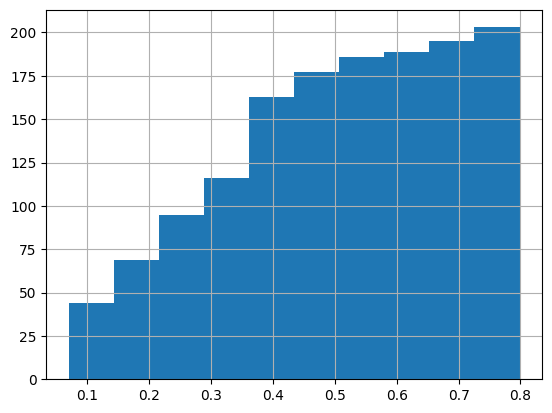

In [ ]:
cosine_distances['cosdist'].hist(cumulative=True)

<AxesSubplot: ylabel='Density'>

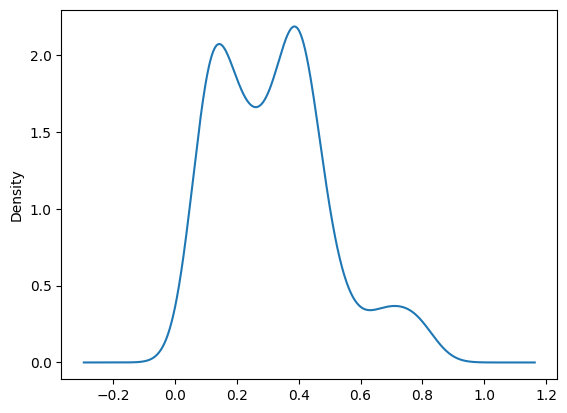

In [ ]:
cosine_distances['cosdist'].plot.density()

<AxesSubplot: >

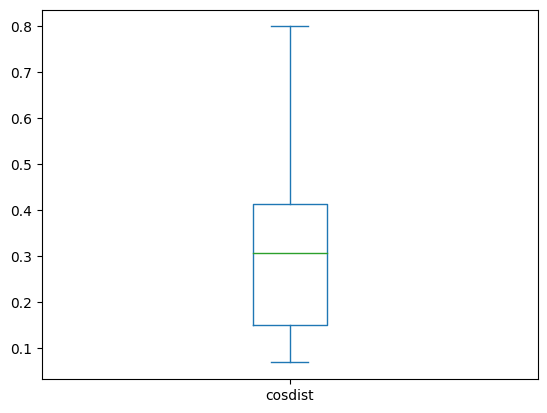

In [ ]:
cosine_distances['cosdist'].plot.box()

In [ ]:
cosine_distances_quantiles = cosine_distances['cosdist'].describe(percentiles=[x/100 for x in range(0,101,5)])


In [ ]:
cosine_distances_quantiles

count    203.000000
mean       0.317085
std        0.178869
min        0.069671
0%         0.069671
5%         0.095558
10%        0.106441
15%        0.117595
20%        0.130967
25%        0.151202
30%        0.183997
35%        0.218698
40%        0.249793
45%        0.284499
50%        0.308165
55%        0.353173
60%        0.376368
65%        0.388125
70%        0.399638
75%        0.414037
80%        0.430705
85%        0.458284
90%        0.528894
95%        0.686873
100%       0.798508
max        0.798508
Name: cosdist, dtype: float64

### xSIM

In [ ]:
xsim_scores = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/_scores/xsim_matrix.csv")
xsim_scores = xsim_scores[xsim_scores["src-tgt"]!="average"]
xsim_scores = xsim_scores[xsim_scores["src-tgt"]!="eng_Latn-eng_Latn"]
xsim_scores

,Unnamed: 0,dataset,src-tgt,xsim,nbex
0,0,flores200,ace_Arab-eng_Latn,95.16,1012
1,1,flores200,ace_Latn-eng_Latn,65.51,1012
2,2,flores200,acm_Arab-eng_Latn,0.20,1012
3,3,flores200,acq_Arab-eng_Latn,0.00,1012
4,4,flores200,aeb_Arab-eng_Latn,0.99,1012
...,...,...,...,...,...
198,198,flores200,yue_Hant-eng_Latn,4.05,1012
199,199,flores200,zho_Hans-eng_Latn,0.00,1012
200,200,flores200,zho_Hant-eng_Latn,4.05,1012
201,201,flores200,zsm_Latn-eng_Latn,0.30,1012


<AxesSubplot: ylabel='Frequency'>

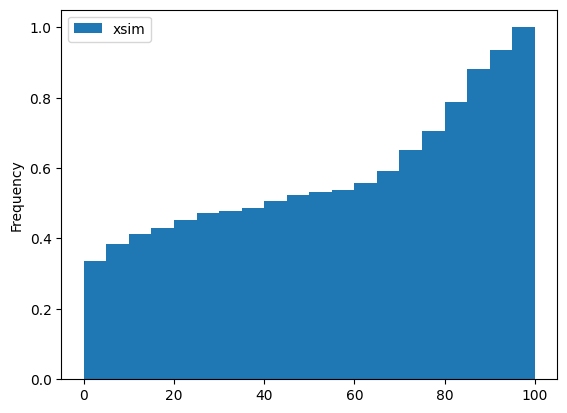

In [ ]:
xsim_scores.plot.hist(column=['xsim'],cumulative=True, bins=range(0,101,5), density=True)

<AxesSubplot: ylabel='Density'>

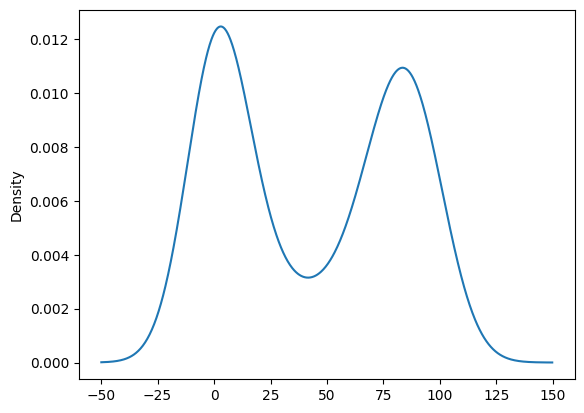

In [ ]:
xsim_scores['xsim'].plot.density()

<AxesSubplot: >

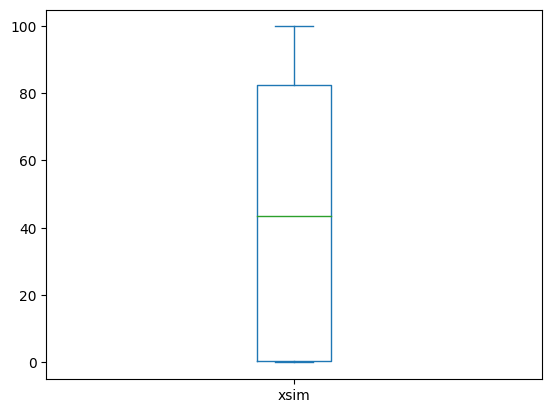

In [ ]:
xsim_scores['xsim'].plot.box()

In [ ]:
xsim_scores['xsim'].describe(percentiles=set([x/100 for x in range(0,101,5)]))

count    203.000000
mean      43.417389
std       38.890398
min        0.000000
0%         0.000000
5%         0.000000
10%        0.000000
15%        0.000000
20%        0.200000
25%        0.400000
30%        0.950000
35%        6.636000
40%       13.120000
45%       24.431000
50%       43.480000
55%       61.780000
60%       70.550000
65%       74.790000
70%       79.390000
75%       82.510000
80%       85.690000
85%       88.620000
90%       91.580000
95%       95.611000
100%      99.800000
max       99.800000
Name: xsim, dtype: float64

In [ ]:
cosine_distances['cosdist'].quantile(.25)

0.1512024328112602

### xSIM++

In [ ]:
xsimpp_scores = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsimplusplus/_scores/xsimpp_matrix.csv")
xsimpp_scores = xsimpp_scores[xsimpp_scores["src-tgt"]!="average"]
xsimpp_scores

,Unnamed: 0,dataset,src-tgt,xsim(++),nbex
0,0,flores200,ace_Arab-eng_Latn,99.90,1012
1,1,flores200,ace_Latn-eng_Latn,93.48,1012
2,2,flores200,acm_Arab-eng_Latn,26.88,1012
3,3,flores200,acq_Arab-eng_Latn,23.62,1012
4,4,flores200,aeb_Arab-eng_Latn,36.86,1012
...,...,...,...,...,...
198,198,flores200,yue_Hant-eng_Latn,44.17,1012
199,199,flores200,zho_Hans-eng_Latn,25.99,1012
200,200,flores200,zho_Hant-eng_Latn,49.01,1012
201,201,flores200,zsm_Latn-eng_Latn,11.96,1012


In [ ]:
xsimpp_scores['xsim(++)'].describe(percentiles=set([x/100 for x in range(0,101,5)]))

count    203.000000
mean      67.147143
std       34.815017
min        7.210000
0%         7.210000
5%        10.970000
10%       13.280000
15%       17.084000
20%       21.816000
25%       27.420000
30%       36.344000
35%       54.316000
40%       66.914000
45%       75.741000
50%       86.560000
55%       93.480000
60%       95.358000
65%       96.670000
70%       97.170000
75%       97.780000
80%       98.280000
85%       98.910000
90%       99.310000
95%       99.600000
100%     100.000000
max      100.000000
Name: xsim(++), dtype: float64

### Quantiles

In [ ]:
quantiles = [
    {
        "quantile": x,
        "cosdist": cosine_distances['cosdist'].quantile(x/100),
        "xsim": xsim_scores['xsim'].quantile(x/100),
        "xsim++": xsimpp_scores['xsim(++)'].quantile(x/100),
    } for x in range(0,101,5)
]

In [ ]:
quantiles_df = pd.DataFrame(quantiles)
quantiles_df.to_csv("/home/lnishimw/scratch/LASER/tasks/_scores/all_quantiles.csv")

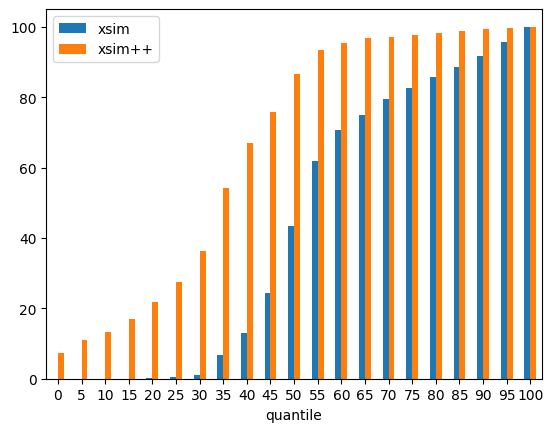

In [ ]:
quantiles_df.plot.bar(x='quantile', y=['xsim', 'xsim++'], rot=0)
plt.savefig("/home/lnishimw/scratch/LASER/tasks/_scores/xsim_xsimpp_quantiles.pdf", format="pdf")

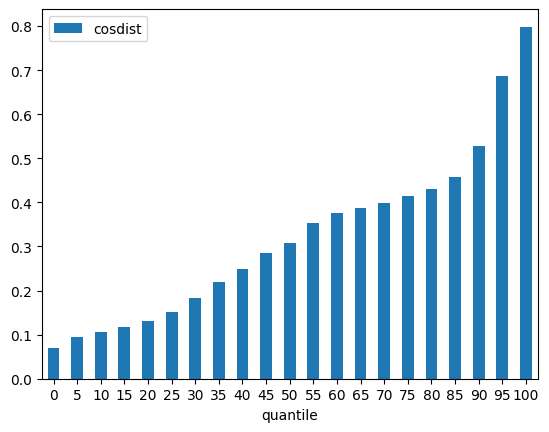

In [ ]:
quantiles_df.plot.bar(x='quantile', y=['cosdist'], rot=0)
plt.savefig("/home/lnishimw/scratch/LASER/tasks/_scores/cos_quantiles.pdf", format="pdf")

### 5 RoCS-MT languages

In [ ]:
cosine_distances_5 = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/xsim_5/cosine_distance_matrix.csv")
cosine_distances_5 = cosine_distances_5[cosine_distances_5["src-tgt"]!="average"]
cosine_distances_5


FileNotFoundError: [Errno 2] No such file or directory: '/home/lnishimw/scratch/LASER/tasks/xsim/xsim_5/cosine_distance_matrix.csv'

In [ ]:
r_cosine_distances_5 = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/rsim_5/cosine_distance_matrix.csv")
r_cosine_distances_5 = r_cosine_distances_5[r_cosine_distances_5["src-tgt"]!="average"]
r_cosine_distances_5

,Unnamed: 0,dataset,src-tgt,cosdist,nbex
0,0,rocsmt,raw.en-norm.en,0.130927,1922
1,1,rocsmt,ref.cs-norm.en,0.191921,1922
2,2,rocsmt,ref.de-norm.en,0.202451,1922
3,3,rocsmt,ref.fr-norm.en,0.193707,1922
4,4,rocsmt,ref.ru-norm.en,0.225688,1922
5,5,rocsmt,ref.uk-norm.en,0.187596,1922


In [ ]:
xsim_scores_5 = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/xsim_5/xsim_matrix.csv")
xsim_scores_5 = xsim_scores_5[xsim_scores_5["src-tgt"]!="average"]
xsim_scores_5

,Unnamed: 0,dataset,src-tgt,xsim,nbex
0,0,rocsmt,raw.en-norm.en,4.06,1922
1,1,rocsmt,ref.cs-norm.en,3.28,1922
2,2,rocsmt,ref.de-norm.en,0.83,1922
3,3,rocsmt,ref.fr-norm.en,4.68,1922
4,4,rocsmt,ref.ru-norm.en,5.93,1922
5,5,rocsmt,ref.uk-norm.en,2.39,1922


In [ ]:
rsim_scores_5 = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/rsim_5/xsim_matrix.csv")
rsim_scores_5 = rsim_scores_5[rsim_scores_5["src-tgt"]!="average"]
rsim_scores_5

,Unnamed: 0,dataset,src-tgt,xsim,nbex
0,0,rocsmt,raw.en-norm.en,7.96,1922
1,1,rocsmt,ref.cs-norm.en,7.70,1922
2,2,rocsmt,ref.de-norm.en,8.48,1922
3,3,rocsmt,ref.fr-norm.en,8.64,1922
4,4,rocsmt,ref.ru-norm.en,10.98,1922
5,5,rocsmt,ref.uk-norm.en,5.93,1922


In [ ]:
df_rocsmt = pd.DataFrame()
df_rocsmt[['src-tgt', 'cosdist']] = cosine_distances_5[['src-tgt', 'cosdist']]
df_rocsmt['r-cosdist'] = r_cosine_distances_5['cosdist']
df_rocsmt['xsim'] = xsim_scores_5['xsim']
df_rocsmt['rsim'] = rsim_scores_5['xsim']
df_rocsmt['src'] = df_rocsmt['src-tgt'].apply(lambda x: x[:6])

In [ ]:
df_rocsmt.sort_values(by=['cosdist'])

,src-tgt,cosdist,r-cosdist,xsim,rsim,src
0,raw.en-norm.en,0.094007,0.130927,4.06,7.96,raw.en
2,ref.de-norm.en,0.111113,0.202451,0.83,8.48,ref.de
1,ref.cs-norm.en,0.149487,0.191921,3.28,7.70,ref.cs
5,ref.uk-norm.en,0.151771,0.187596,2.39,5.93,ref.uk
3,ref.fr-norm.en,0.160926,0.193707,4.68,8.64,ref.fr
4,ref.ru-norm.en,0.189940,0.225688,5.93,10.98,ref.ru


In [ ]:
df_rocsmt

,src-tgt,cosdist,r-cosdist,xsim,rsim,src
0,raw.en-norm.en,0.094007,0.130927,4.06,7.96,raw.en
1,ref.cs-norm.en,0.149487,0.191921,3.28,7.70,ref.cs
2,ref.de-norm.en,0.111113,0.202451,0.83,8.48,ref.de
3,ref.fr-norm.en,0.160926,0.193707,4.68,8.64,ref.fr
4,ref.ru-norm.en,0.189940,0.225688,5.93,10.98,ref.ru
5,ref.uk-norm.en,0.151771,0.187596,2.39,5.93,ref.uk


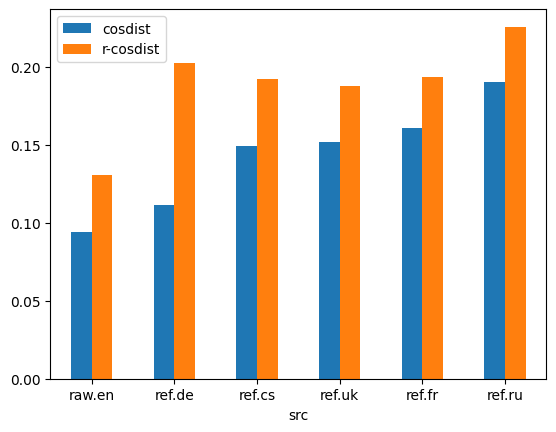

In [ ]:
df_rocsmt.sort_values(by=['cosdist']).plot.bar(x='src', y=['cosdist', 'r-cosdist'], rot=0)
plt.savefig("/home/lnishimw/scratch/LASER/tasks/cosdist_rocsmt.pdf", format="pdf")

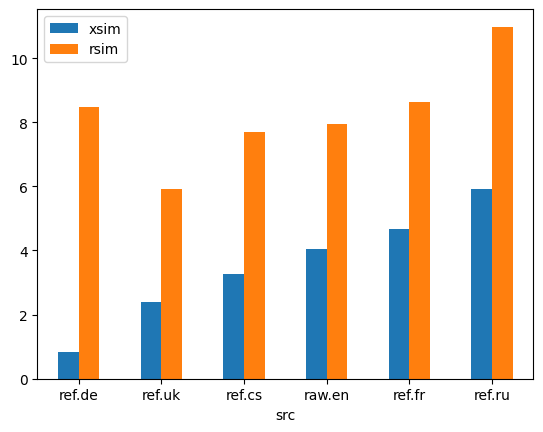

In [ ]:
df_rocsmt.sort_values(by=['xsim']).plot.bar(x='src', y=['xsim', 'rsim'], rot=0)
plt.savefig("/home/lnishimw/scratch/LASER/tasks/xsim_rocsmt.pdf", format="pdf")

### BUCC

In [ ]:
bucc = pd.DataFrame(columns=["lang-pair", "original", "no preprocessing"])

In [ ]:
bucc["lang-pair"] = [ "de-en", "fr-en", "ru-en", "zh-en" ]
bucc["original"] = [ 0.9921016005567153, 0.9838946364370093, 0.9762152176423046, 0.9770054414604177 ]
bucc["no preprocessing"] = [ 0.8336464857341683, 0.9450253136693815, 0.9560327906708231, 0.9366333157802351 ]

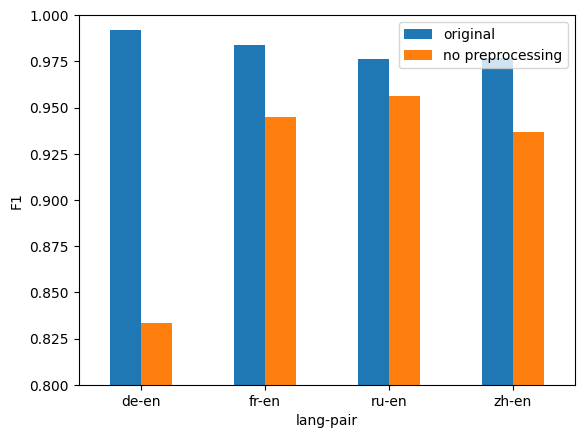

In [ ]:
bucc.plot.bar(x='lang-pair', y=['original', 'no preprocessing'], rot=0, ylim=(0.8, 1), ylabel="F1")
plt.savefig("/home/lnishimw/scratch/LASER/tasks/bucc_scores.pdf", format="pdf")

# Visualisation of embedding space

In [1]:
import os, json
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, paired_euclidean_distances, paired_cosine_distances
from scipy.stats import spearmanr

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-

In [2]:

def read_embeddings(input_file, dim=1024, normalized=True):
    X = np.fromfile(input_file, dtype=np.float32, count=-1)
    X = np.resize(X, (X.shape[0] // dim, dim))
    if normalized:
        X = normalize(X)
    return X


In [3]:
def get_visualization_dataframe(src_file, ref_file, model, src_type="ugc", ref_type="std", seed=0):
    X_src = read_embeddings(src_file)
    X_ref = read_embeddings(ref_file)
    X = np.concatenate([X_ref, X_src])
    pca = PCA(n_components=2, random_state=seed)
    umap = UMAP(n_components=2, init='random', random_state=seed)
    tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=20, random_state=seed)
    data = pd.DataFrame()
    data[["PCA dim 1", "PCA dim 2"]] = pca.fit_transform(X)
    data[["t-SNE dim 1", "t-SNE dim 2"]] = tsne.fit_transform(X)
    data[["UMAP dim 1", "UMAP dim 2"]] = umap.fit_transform(X)
    data["model"] = np.repeat([model], X.shape[0])
    data["type"] = np.repeat([ref_type, src_type], X_ref.shape[0])
    data["sentence"] = [ f"sent {i%X_ref.shape[0]}" for i in range(X.shape[0]) ]
    return X, data


In [151]:
def get_visualization_dataframe_3D(src_file, ref_file, model, src_type="ugc", ref_type="std", seed=0):
    X_src = read_embeddings(src_file)
    X_ref = read_embeddings(ref_file)
    X = np.concatenate([X_ref, X_src])
    pca = PCA(n_components=3, random_state=seed)
    data = pd.DataFrame()
    data[["PCA dim 1", "PCA dim 2", "PCA dim 3"]] = pca.fit_transform(X)
    data["model"] = np.repeat([model], X.shape[0])
    data["type"] = np.repeat([ref_type, src_type], X_ref.shape[0])
    data["sentence"] = [ f"sent {i%X_ref.shape[0]}" for i in range(X.shape[0]) ]
    return X, data

In [4]:
flores_dev_leet = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/flores200/100/dev/cleaned.eng_leet_Latn.dev"
flores_dev_ugc = "/home/lnishimw/scratch/experiments/robust_embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/flores200/100/dev/cleaned.eng_Latn_ugc.dev"
flores_dev = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/flores200/100/dev/cleaned.eng_Latn.dev"
rocsmt_raw = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/laser/rocsmt/test/raw.en.test"
rocsmt_norm = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/laser/rocsmt/test/norm.en.test"
multilexnorm_src = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/multilexnorm2021/test/cleaned.en.src.test"
multilexnorm_ref = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/multilexnorm2021/test/cleaned.en.ref.test"


In [5]:
flores_dev_leet_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/roberta-student/flores200/100/dev/cleaned.eng_leet_Latn.dev"
flores_dev_ugc_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/roberta-student/flores200/100/dev/cleaned.eng_Latn_ugc.dev"
flores_dev_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/roberta-student/flores200/100/dev/cleaned.eng_Latn.dev"
rocsmt_raw_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/roberta-student/rocsmt/test/raw.en.test"
rocsmt_norm_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/roberta-student/rocsmt/test/norm.en.test"
multilexnorm_src_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/roberta-student/multilexnorm2021/test/cleaned.en.src.test"
multilexnorm_ref_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/roberta-student/multilexnorm2021/test/cleaned.en.ref.test"

In [6]:
flores_dev_leet_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/character-roberta-student/flores200/100/dev/cleaned.eng_leet_Latn.dev"
flores_dev_ugc_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/character-roberta-student/flores200/100/dev/cleaned.eng_Latn_ugc.dev"
flores_dev_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/character-roberta-student/flores200/100/dev/cleaned.eng_Latn.dev"
rocsmt_raw_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/character-roberta-student/rocsmt/test/raw.en.test"
rocsmt_norm_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/character-roberta-student/rocsmt/test/norm.en.test"
multilexnorm_src_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/character-roberta-student/multilexnorm2021/test/cleaned.en.src.test"
multilexnorm_ref_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/character-roberta-student/multilexnorm2021/test/cleaned.en.ref.test"

In [7]:
plots_path = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/plots"
os.makedirs(plots_path, exist_ok=True)

In [8]:
plt.figure(dpi=1200) 

<Figure size 7680x5760 with 0 Axes>

<Figure size 7680x5760 with 0 Axes>

In [9]:
src_file = rocsmt_raw
ref_file = rocsmt_norm
model="LASER"
X, data = get_visualization_dataframe(src_file, ref_file, model)

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


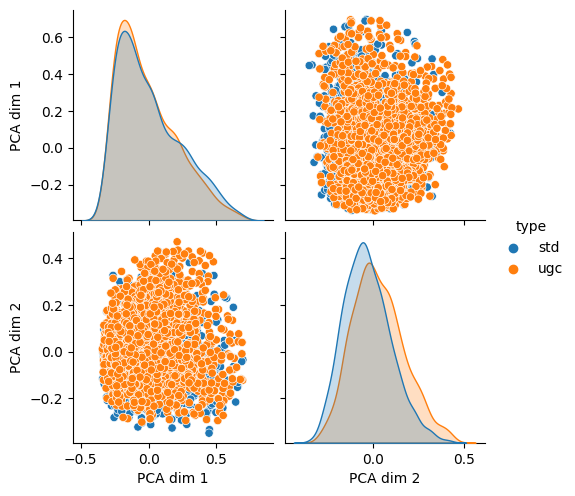

In [10]:
sns.pairplot(data[["PCA dim 1", "PCA dim 2", "type"]], hue="type")
#plt.savefig(f"{plots_path}/pca_pairplot_{model}.png")

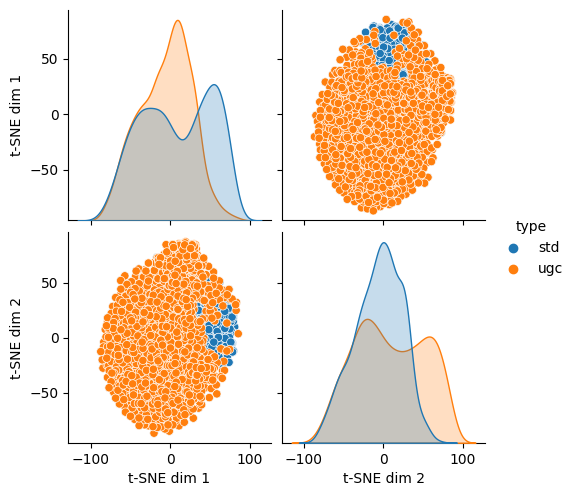

In [ ]:
sns.pairplot(data[["t-SNE dim 1", "t-SNE dim 2", "type"]], hue="type")
plt.savefig(f"{plots_path}/tsne_pairplot_{model}.png")

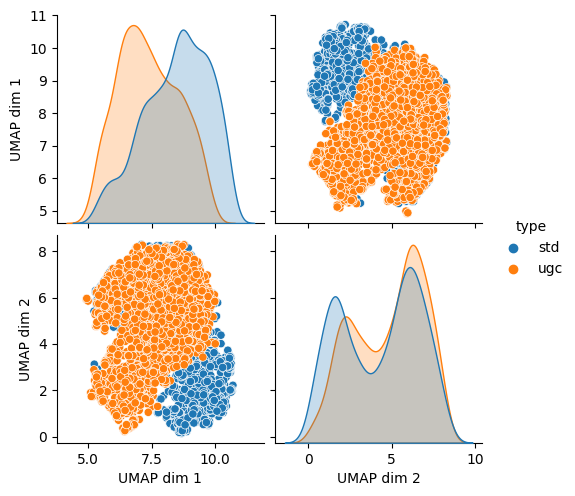

In [ ]:
sns.pairplot(data[["UMAP dim 1", "UMAP dim 2", "type"]], hue="type")
plt.savefig(f"{plots_path}/umap_pairplot_{model}.png")

## Qualitative analysis

In [ ]:
def plot_circles(ax, data, dim_reduction="PCA"):
    if dim_reduction == "UMAP":
        columns = ["UMAP dim 1", "UMAP dim 2"]
    elif dim_reduction == "t-SNE":
        columns = ["t-SNE dim 1", "t-SNE dim 2"]
    else:
        columns = ["PCA dim 1", "PCA dim 2"]
    laser_std_row = data.loc[((data['model'] == 'LASER') & (data['type'] == 'std'))]
    circle_center = laser_std_row[columns].to_numpy().flatten()
    for i, row in data.iterrows():
        point_b = row[columns].to_numpy()
        radius = paired_euclidean_distances(circle_center.reshape(1, -1), point_b.reshape(1, -1))[0]
        ax.add_patch(plt.Circle(circle_center, radius, alpha=0.2, color='xkcd:lightblue'))
    sns.scatterplot(data, x=columns[0], y=columns[1], hue="model", style="type", s=50, linewidth=0, ax=ax)

In [ ]:
def plot_langs(ax, data, dim_reduction="PCA"):
    if dim_reduction == "UMAP":
        columns = ["UMAP dim 1", "UMAP dim 2"]
    elif dim_reduction == "t-SNE":
        columns = ["t-SNE dim 1", "t-SNE dim 2"]
    else:
        columns = ["PCA dim 1", "PCA dim 2"]
    # sns.scatterplot(data, x=columns[0], y=columns[1], c="tab:purple", marker="s", linewidth=0, ax=ax)
    for _, row in data.iterrows():
        ax.text(row[columns[0]] - 0.01, row[columns[1]] + 0.01, row["lang"], c="tab:blue")

In [ ]:
def distance_preservation_correlation(X1, data1, X2=None, data2=None):
    if X2 is None:
        X2 = X1
    if data2 is None:
        data2 = data1
    dist_orig = np.square(euclidean_distances(X1, X2)).flatten()
    dist_pca = np.square(euclidean_distances(data1[["PCA dim 1","PCA dim 2"]], data2[["PCA dim 1","PCA dim 2"]])).flatten()
    # dist_tsne = np.square(euclidean_distances(data1[["t-SNE dim 1","t-SNE dim 2"]], data2[["t-SNE dim 1","t-SNE dim 2"]])).flatten()
    # dist_umap = np.square(euclidean_distances(data1[["UMAP dim 1","UMAP dim 2"]], data2[["UMAP dim 1","UMAP dim 2"]])).flatten()
    print("PCA", spearmanr(dist_orig, dist_pca))
    # print("t-SNE", spearmanr(dist_orig, dist_tsne))
    # print("UMAP", spearmanr(dist_orig, dist_umap))


In [ ]:
norm_en_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/norm.en.test.bin"
raw_en_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/raw.en.test.bin"
ref_cs_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.cs.test.bin"
ref_de_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.de.test.bin"
ref_fr_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.fr.test.bin"
ref_ru_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.ru.test.bin"
ref_uk_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.uk.test.bin"

### Std-UGC data

In [ ]:
src_file = raw_en_laser
ref_file = norm_en_laser
model="LASER"
X_laser, laser_data = get_visualization_dataframe(src_file, ref_file, model)

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [ ]:
src_file = rocsmt_raw_roberta
ref_file = rocsmt_norm_roberta
model="RoLASER"
X_roberta, roberta_data = get_visualization_dataframe(src_file, ref_file, model)

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [ ]:
src_file = rocsmt_raw_c_roberta
ref_file = rocsmt_norm_c_roberta
model="c-RoLASER"
X_c_roberta, c_roberta_data = get_visualization_dataframe(src_file, ref_file, model)

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


### Multilingual data

In [ ]:
noisy_files = [
    {
        "file": raw_en_laser,
        "model": "LASER",
        "type": "ugc"
    },
    {
        "file": rocsmt_raw_roberta,
        "model": "RoLASER",
        "type": "ugc"
    },
    {
        "file": rocsmt_norm_roberta,
        "model": "RoLASER",
        "type": "std"
    },
    {
        "file": rocsmt_raw_c_roberta,
        "model": "c-RoLASER",
        "type": "ugc"
    },
    {
        "file": rocsmt_norm_c_roberta,
        "model": "c-RoLASER",
        "type": "std"
    }
]

In [ ]:
multilingual_files = {
    "en": norm_en_laser,
    "cs": ref_cs_laser,
    "de": ref_de_laser,
    "fr": ref_fr_laser,
    "ru": ref_ru_laser,
    "uk": ref_uk_laser
}


In [ ]:
seed = 0
X_multi_files = [ read_embeddings(file) for file in multilingual_files.values() ] 
X_noisy_files = [ read_embeddings(file["file"]) for file in noisy_files ]
X = np.concatenate(X_multi_files + X_noisy_files)

n_sentences =  X_multi_files[0].shape[0]

X_multi_models = np.repeat(["LASER"], n_sentences * len(X_multi_files))
X_noisy_models = np.repeat([file["model"] for file in noisy_files], n_sentences)

X_multi_langs = np.repeat(list(multilingual_files.keys()), n_sentences)
X_noisy_langs = np.repeat(["en"], n_sentences * len(X_noisy_files))

X_multi_types = np.repeat(["std"] + ["tra"]*(len(X_multi_files)-1), n_sentences)
X_noisy_types = np.repeat([file["type"] for file in noisy_files], n_sentences)

pca = PCA(n_components=2, random_state=seed)
# umap = UMAP(n_components=2, init='random', random_state=seed)
# tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=20, random_state=seed)

data = pd.DataFrame()
data[["PCA dim 1", "PCA dim 2"]] = pca.fit_transform(X)
# data[["t-SNE dim 1", "t-SNE dim 2"]] = tsne.fit_transform(X)
# data[["UMAP dim 1", "UMAP dim 2"]] = umap.fit_transform(X)
data["model"] = np.concatenate([X_multi_models, X_noisy_models])
data["lang"] = np.concatenate([X_multi_langs, X_noisy_langs])
data["type"] = np.concatenate([X_multi_types, X_noisy_types])
data["sentence"] = [ f"sent {i%n_sentences}" for i in range(X.shape[0]) ]


## Dimension reduction

In [ ]:
examples = [
    {
        "id": 986,
        "ugc": "eye wud liek 2 aply 4 vilage idot",
        "std": "I would like to apply for village idiot."
    },
    {
        "id": 760,
        "ugc": "But tmrw im no longer putting up with it.",
        "std": "But tomorrow I’m no longer putting up with it."            
    }
]


In [ ]:
subset = pd.DataFrame()

In [ ]:
n_ex = 0

In [ ]:
subset = data[data["sentence"] == f"sent {examples[n_ex]['id']}"]

In [ ]:
subset_multi = subset[subset["type"] == "tra"]

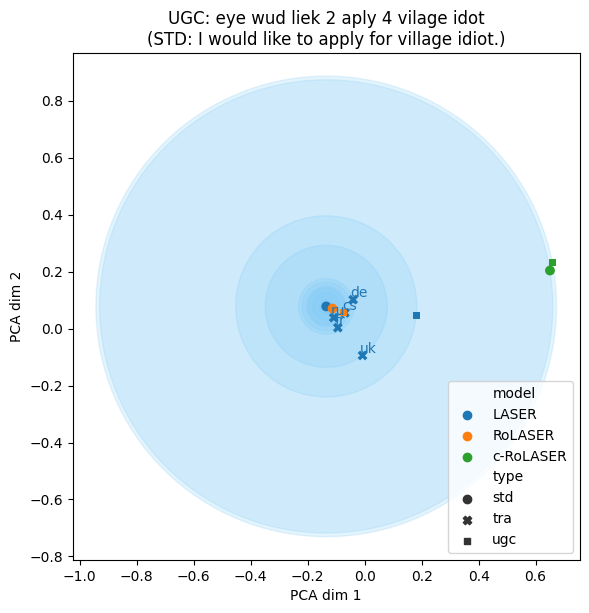

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,6))
plot_circles(ax1, subset)
plot_langs(ax1, subset_multi)
ax1.set_title(f"UGC: {examples[n_ex]['ugc']}\n(STD: {examples[n_ex]['std']})")
ax1.set_aspect("equal")
ax1.legend(loc='lower right')
fig.tight_layout(pad=0.25)
#plt.savefig("/home/lnishimw/scratch/LASER/tasks/_scores/pca_distances.pdf", format="pdf")

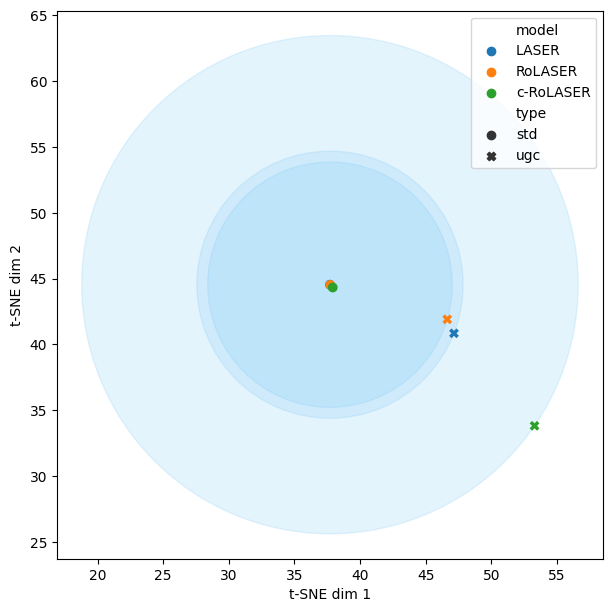

In [ ]:
fig, ax2 = plt.subplots(figsize=(6,6))
plot_circles(ax2, subset_noisy, "t-SNE")
# plot_langs(ax2, subset_multi, "t-SNE")
ax2.legend(loc='upper right')
fig.tight_layout(pad=0.25)
#plt.savefig("/home/lnishimw/scratch/LASER/tasks/_scores/tsne_distances.pdf", format="pdf")

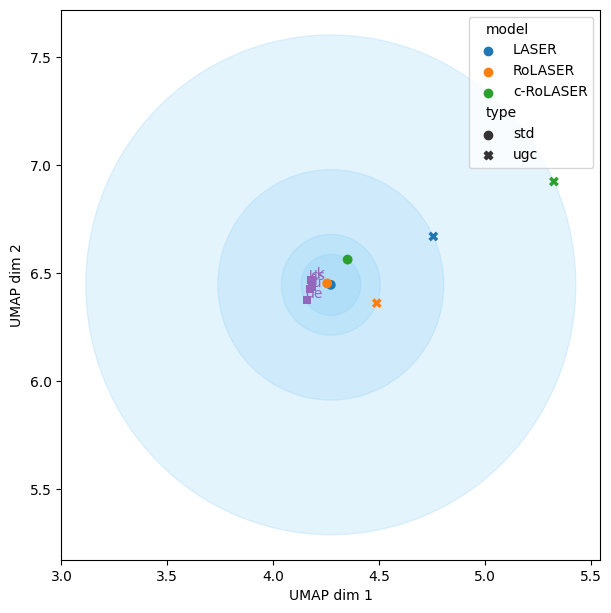

In [ ]:
fig, ax3 = plt.subplots(figsize=(6,6))
plot_circles(ax3, subset_noisy, "UMAP")
plot_langs(ax3, subset_multi, "UMAP")
ax2.legend(loc='upper right')
fig.tight_layout(pad=0.25)
#plt.savefig("/home/lnishimw/scratch/LASER/tasks/_scores/umap_distances.pdf", format="pdf")

In [ ]:
distance_preservation_correlation(X_laser, laser_data)

PCA SpearmanrResult(correlation=0.5171118712952246, pvalue=0.0)
t-SNE SpearmanrResult(correlation=0.447204703404828, pvalue=0.0)
UMAP SpearmanrResult(correlation=0.31223888945607375, pvalue=0.0)


In [ ]:
distance_preservation_correlation(X_roberta, roberta_data)

PCA SpearmanrResult(correlation=0.6036851927352521, pvalue=0.0)
t-SNE SpearmanrResult(correlation=0.4828952973220026, pvalue=0.0)
UMAP SpearmanrResult(correlation=0.3115118782733266, pvalue=0.0)


In [ ]:
distance_preservation_correlation(X_c_roberta, c_roberta_data)

PCA SpearmanrResult(correlation=0.6226180132459751, pvalue=0.0)
t-SNE SpearmanrResult(correlation=0.4387390848838547, pvalue=0.0)
UMAP SpearmanrResult(correlation=0.32377321143483784, pvalue=0.0)


In [ ]:
distance_preservation_correlation(X_laser, laser_data, X_roberta, roberta_data)

PCA SpearmanrResult(correlation=0.38195282160472616, pvalue=0.0)
t-SNE SpearmanrResult(correlation=0.3741878710283902, pvalue=0.0)
UMAP SpearmanrResult(correlation=0.007761505725226752, pvalue=1.4721199622448286e-204)


In [ ]:
distance_preservation_correlation(X_laser, laser_data, X_c_roberta, c_roberta_data)

PCA SpearmanrResult(correlation=0.4922625311122613, pvalue=0.0)
t-SNE SpearmanrResult(correlation=0.306934157077937, pvalue=0.0)
UMAP SpearmanrResult(correlation=-0.6122645614581149, pvalue=0.0)


In [ ]:
distance_preservation_correlation(X_roberta, roberta_data, X_c_roberta, c_roberta_data)

PCA SpearmanrResult(correlation=0.4892781155237972, pvalue=0.0)
t-SNE SpearmanrResult(correlation=0.3855124100397888, pvalue=0.0)
UMAP SpearmanrResult(correlation=-0.4066868847925667, pvalue=0.0)


### Cosine distances

In [ ]:
X_laser.shape[0]//2

1922

In [ ]:
n = X_laser.shape[0]//2
X_laser_std = X_laser[:n,:]
X_laser_ugc = X_laser[n:,:]
cos_dist = paired_cosine_distances(X_laser_std, X_laser_ugc)

In [ ]:
distances = pd.DataFrame()
distances["cos"] = cos_dist

In [ ]:
distances.head(618)

,cos
0,2.712072e-02
1,8.744984e-02
2,4.487007e-02
3,9.845792e-03
4,1.049149e-02
...,...
613,2.852289e-02
614,5.804627e-02
615,4.047482e-14
616,1.021274e-01


In [ ]:
distances.sort_values(by="cos", ascending=False).head(20)

,cos
843,0.786924
1014,0.736194
1209,0.706535
1152,0.674260
1454,0.651496
1368,0.645408
995,0.644448
1079,0.627664
981,0.611222
1840,0.601122


<AxesSubplot: ylabel='Density'>

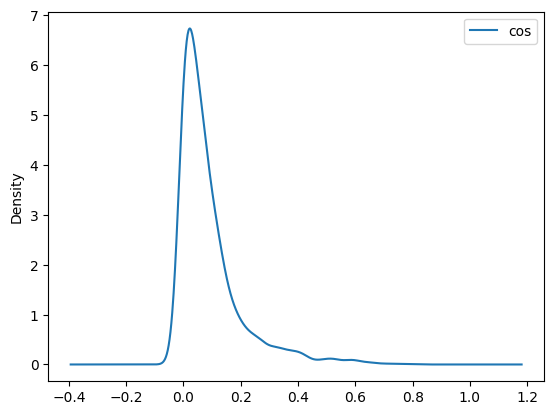

In [ ]:
distances.plot.density()

<AxesSubplot: ylabel='Frequency'>

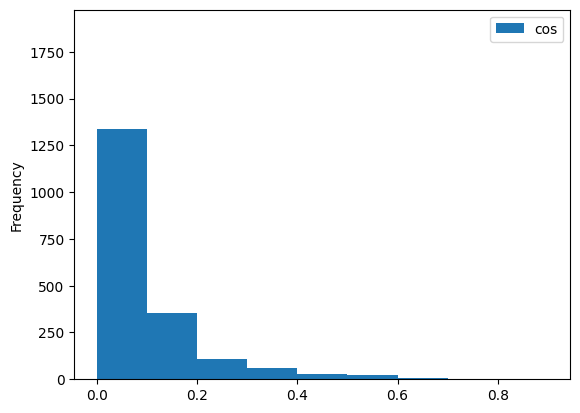

In [ ]:
distances.plot.hist(bins=[i/10 for i in range(10)], ylim=(0,1975))

In [ ]:
[i/10 for i in range(10)]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
distances[distances["cos"] == 0].size #/ distances.size

0.24720244150559512

## Student v. LASER on standard data

In [11]:
experiment_dir = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz"
embeddings_dir = os.path.join(experiment_dir, "embeddings")
plots_dir = os.path.join(experiment_dir, "plots")
os.makedirs(plots_dir, exist_ok=True)
scores_dir = os.path.join(experiment_dir, "scores")
os.makedirs(scores_dir, exist_ok=True)

In [12]:
FILES = {
    "flores200" : {},
    "rocsmt" : {},
    "multilexnorm2021" : {},
}

In [13]:
CORPORA = list(FILES.keys())

In [14]:
MODEL_NAMES = {
    "laser" : "LASER",
    "roberta-student" : "RoLASER",
    "character-roberta-student" : "c-RoLASER",
}

In [15]:
MODELS = list(MODEL_NAMES.keys())

In [17]:
for model in MODELS:
    FILES["flores200"][model] = os.path.join(embeddings_dir, model, "flores200/devtest/eng_Latn.devtest")
    FILES["rocsmt"][model] = os.path.join(embeddings_dir, model, "rocsmt/test/norm.en.test")
    FILES["multilexnorm2021"][model] = os.path.join(embeddings_dir, model, "multilexnorm2021/en/test/en.ref.test")


In [18]:
FILES

{'flores200': {'laser': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/laser/flores200/devtest/eng_Latn.devtest',
  'roberta-student': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/roberta-student/flores200/devtest/eng_Latn.devtest',
  'character-roberta-student': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/character-roberta-student/flores200/devtest/eng_Latn.devtest'},
 'rocsmt': {'laser': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/laser/rocsmt/test/norm.en.test',
  'roberta-student': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/roberta-student/rocsmt/test/norm.en.test',
  'character-roberta-student': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/character-roberta-student/rocsmt/test/norm.en.test'},
 'multilexnorm2021': {'lase

In [19]:
def plot_visualization_data(data, plots_dir, model_pair):
    plt.clf()
    _ = sns.pairplot(data[["PCA dim 1", "PCA dim 2", "type"]], hue="type")
    plt.savefig(f"{plots_dir}/pca_pairplot_std_{model_pair}.png")
    plt.clf()
    _ = sns.pairplot(data[["t-SNE dim 1", "t-SNE dim 2", "type"]], hue="type")
    plt.savefig(f"{plots_dir}/tsne_pairplot_std_{model_pair}.png")
    plt.clf()
    _ = sns.pairplot(data[["UMAP dim 1", "UMAP dim 2", "type"]], hue="type")
    plt.savefig(f"{plots_dir}/umap_pairplot_std_{model_pair}.png")
    plt.close()

In [228]:
def plot_visualization_data_3D(data, plots_dir, model_pair):
    plt.clf()
    _ = sns.pairplot(data[["PCA dim 1", "PCA dim 2", "PCA dim 3", "type"]], hue="type")
    plt.savefig(f"{plots_dir}/pca3d_pairplot_std_{model_pair}.png")
    plt.clf()
    _, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)
    # tight_layout() adjusts the subplots to fit into the figure area.
    #plt.tight_layout()
    sns.scatterplot(data, x="PCA dim 1", y="seq_len", hue="seq_len", style="type", palette="viridis", ax=axs[0])
    sns.scatterplot(data, x="PCA dim 2", y="seq_len", hue="seq_len", style="type", palette="viridis", ax=axs[1])
    sns.scatterplot(data, x="PCA dim 3", y="seq_len", hue="seq_len", style="type", palette="viridis", ax=axs[2])
    plt.savefig(f"{plots_dir}/pca3d_by_len_std_{model_pair}.png")
    plt.close()

In [210]:
def plot_cosine_distances(cosine_distances, plots_dir):
    # reset fig size to default
    plt.figure(figsize=(8,6))
    plt.clf()
    ax = sns.boxplot(cosine_distances, x="model", y="cos_dist")
    ax.set(ylim=(0,1))
    ax.set(xlabel='model pair', ylabel='pairwise cosine distance')
    plt.savefig(f"{plots_dir}/cos_dist_boxplot_std.png")
    plt.clf()
    sns.scatterplot(cosine_distances, x="len_diff", y="cos_dist", hue="model")
    plt.savefig(f"{plots_dir}/cos_dist_by_len_std.png")
    plt.close()


In [21]:
def write_json(data, file_path):
    with open(file_path, 'w') as json_file:
        json.dump(data, json_file, indent=4)

In [ ]:
from transformers import RobertaTokenizer, BertTokenizer
import sentencepiece as spm

SUPPORTED_TOKENIZERS = ["char", "roberta", "spm"]
SPM_MODEL_PATH = "/home/lnishimw/scratch/LASER/models/laser2.spm"

class CustomTokenizer():
    def __init__(self, tokenizer_name="spm"):
        self.tokenizer_name = tokenizer_name
        if tokenizer_name == "char":
            self.tokenizer_model = BertTokenizer.from_pretrained("bert-base-cased").basic_tokenizer
        elif tokenizer_name == "roberta":
            self.tokenizer_model = RobertaTokenizer.from_pretrained("roberta-base")
        elif tokenizer_name == "spm":
            self.tokenizer_model = spm.SentencePieceProcessor()
            self.tokenizer_model.load(SPM_MODEL_PATH)
        else:
            raise ValueError(f"The tokenizer {tokenizer_name} is unknown. Expected values are {SUPPORTED_TOKENIZERS}.")
    
    def tokenize(self, line):
        if self.tokenizer_name == "char":
            tokens = self.tokenizer_model.tokenize(line.strip())
            characters = [ " ".join(token) for token in tokens ]
            return " _EOW ".join(characters) + " _EOW"
        if self.tokenizer_name == "roberta":
            tokens = self.tokenizer_model.tokenize(line.strip())
            return " ".join(tokens)
        # SPM
        tokens = self.tokenizer_model.encode_as_pieces(line.strip())
        return " ".join(tokens)


In [ ]:
# write TOKENIZERS dict with tokenizers
TOKENIZERS = {
    "character-roberta-student": CustomTokenizer("char"),
    "roberta-student": CustomTokenizer("roberta"),
    "laser": CustomTokenizer("spm")
}

In [ ]:
RAW_FILES = {
    "flores200" : "/home/lnishimw/scratch/datasets/flores200/devtest/eng_Latn.devtest",
    "rocsmt" : "/home/lnishimw/scratch/datasets/rocsmt/test/norm.en.test",
    "multilexnorm2021" : "/home/lnishimw/scratch/datasets/multilexnorm2021/en/test/en.ref.test"
}

In [ ]:
def file_seq_lengths(models, raw_file):
    tokenized_lines = []
    for model in models:
        tokenizer = TOKENIZERS[model]
        with open(raw_file, "r") as f:
            lines = f.readlines()
        tokenized_lines.extend([ tokenizer.tokenize(line) for line in lines ])
    sequence_lengths = np.array([ len(line.split()) for line in tokenized_lines ])
    
    return sequence_lengths


In [261]:
def compare_standard_embeddings(corpus, model_names=MODEL_NAMES, all_files=FILES):
    files = all_files[corpus]
    cos_dist = {}
    len_diff = {}
    models = list(model_names.keys())
    plots_path = os.path.join(plots_dir, corpus)
    os.makedirs(plots_path, exist_ok=True)
    for model in models[1:]:
        print("Comparing LASER with", model_names[model])
        ref_file = files["laser"]
        src_file = files[model]
        model_pair = f"{model_names[model]}_LASER"
        X, data = get_visualization_dataframe_3D(src_file, ref_file, model_pair, src_type=model_names[model], ref_type="LASER")
        seq_lengths = file_seq_lengths(["laser", model], RAW_FILES[corpus])
        n_sentences = X.shape[0]//2
        cos_dist[model_pair] = paired_cosine_distances(X[:n_sentences,:], X[n_sentences:,:])
        len_diff[model_pair] = seq_lengths[:n_sentences]- seq_lengths[n_sentences:]
        data["seq_len"] = seq_lengths
        plot_visualization_data_3D(data, plots_path, model_pair)
    print("Concatenating results")
    cosine_distances = pd.DataFrame(columns=["cos_dist", "model", "len_diff"])
    cosine_distances["cos_dist"] = np.concatenate(list(cos_dist.values()))
    cosine_distances["len_diff"] = np.concatenate(list(len_diff.values()))
    cosine_distances["model"] = np.repeat(list(cos_dist.keys()), n_sentences)
    plot_cosine_distances(cosine_distances, plots_path)
    cos_dist_avg = { model : cos_dist[model].mean(dtype=np.float64) for model in cos_dist }
    print("Average cost dist", cos_dist_avg)
    write_json(cos_dist_avg, os.path.join(scores_dir, f"{corpus}_avg_cos_dist.json"))
    return data, cosine_distances



### FLORES

In [262]:
corpus = "flores200"
data_flores, cos_dist_flores = compare_standard_embeddings(corpus)

Comparing LASER with RoLASER
Comparing LASER with c-RoLASER
Concatenating results
Average cost dist {'RoLASER_LASER': 0.023123627178842136, 'c-RoLASER_LASER': 0.0526975672710466}


<Figure size 640x480 with 0 Axes>

<Figure size 862.25x750 with 0 Axes>

<Figure size 874.75x750 with 0 Axes>

### RoCS-MT

In [263]:
corpus = "rocsmt"
data_rocsmt, cos_dist_rocsmt = compare_standard_embeddings(corpus)

Comparing LASER with RoLASER
Comparing LASER with c-RoLASER
Concatenating results
Average cost dist {'RoLASER_LASER': 0.054778324574829076, 'c-RoLASER_LASER': 0.26724242305036144}


<Figure size 640x480 with 0 Axes>

<Figure size 862.25x750 with 0 Axes>

<Figure size 874.75x750 with 0 Axes>

### MultiLexNorm

In [264]:
corpus = "multilexnorm2021"
data_mulilexnorm, cos_dist_multilexnorm = compare_standard_embeddings(corpus)

Comparing LASER with RoLASER
Comparing LASER with c-RoLASER
Concatenating results
Average cost dist {'RoLASER_LASER': 0.04558677935663158, 'c-RoLASER_LASER': 0.09821005375041657}


<Figure size 640x480 with 0 Axes>

<Figure size 862.25x750 with 0 Axes>

<Figure size 874.75x750 with 0 Axes>

### Difference between std-gold and ugc-gold loss. 

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

LOSSES = ["loss_std_gold", "loss_ugc_gold", "valid_distil_loss"]
x_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter.set_powerlimits((-4, -4))  # Set the exponent range to (-4, -4)
x_formatter.set_powerlimits((-4, 4))  # Set the exponent range to (5, 5)

In [254]:
all_scores = pd.read_csv("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_034_jz/scores/all_scores.csv").sort_values(by="steps")

Plotting separate loss curves for each model...


<Figure size 640x480 with 0 Axes>

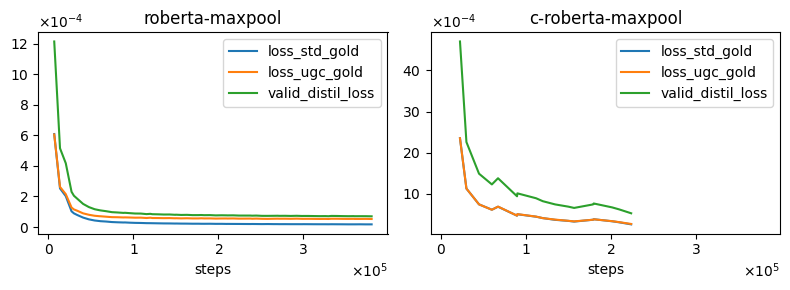

In [257]:
plt.clf()
models = all_scores["model"].unique()
n_rows = models.size//2
n_cols = min(models.size, 2)
fig, axs = plt.subplots(n_rows, n_cols, squeeze=False, figsize=(4*n_cols, 3*n_rows), sharex=True)

print("Plotting separate loss curves for each model...")
for n, model in enumerate(models):
    i, j = n//2, n%2
    all_scores[all_scores["model"] == model].plot(x="steps", y=LOSSES, ax=axs[i,j], title=model)
    axs[i,j].xaxis.set_major_formatter(x_formatter)
    axs[i,j].yaxis.set_major_formatter(y_formatter)
fig.tight_layout()

In [236]:
rolaser = all_scores[all_scores['model'] == 'roberta-maxpool']
c_rolaser = all_scores[all_scores['model'] == 'c-roberta-maxpool']

In [237]:
rolaser_diff = rolaser['loss_ugc_gold'] - rolaser['loss_std_gold']
c_rolaser_diff = c_rolaser['loss_ugc_gold'] - c_rolaser['loss_std_gold']

In [239]:
c_rolaser.describe()

,Unnamed: 0.1,epoch,steps,loss_std_gold,loss_ugc_gold,valid_distil_loss,Unnamed: 0
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,79.000000,6.000000,128784.736842,0.000562,0.000564,0.001126,9.000000
std,5.627314,2.924988,65418.832930,0.000482,0.000481,0.000963,5.627314
min,70.000000,1.000000,22414.000000,0.000260,0.000269,0.000529,0.000000
25%,74.500000,3.500000,78449.000000,0.000340,0.000342,0.000681,4.500000
50%,79.000000,6.000000,134484.000000,0.000385,0.000382,0.000767,9.000000
75%,83.500000,8.500000,179656.000000,0.000561,0.000561,0.001122,13.500000
max,88.000000,10.000000,224140.000000,0.002352,0.002352,0.004704,18.000000


In [258]:
c_rolaser[c_rolaser['loss_ugc_gold'] - c_rolaser['loss_std_gold'] > 0.000001].describe()

,Unnamed: 0.1,epoch,steps,loss_std_gold,loss_ugc_gold,valid_distil_loss,Unnamed: 0
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,78.500000,6.916667,150863.000000,0.000388,0.000392,0.000781,8.500000
std,5.518564,2.429303,54836.467219,0.000122,0.000121,0.000243,5.518564
min,71.000000,3.000000,67242.000000,0.000260,0.000269,0.000529,1.000000
25%,74.500000,5.000000,106552.500000,0.000323,0.000327,0.000650,4.500000
50%,78.000000,7.000000,150000.000000,0.000344,0.000346,0.000690,8.000000
75%,81.750000,9.250000,203794.500000,0.000452,0.000454,0.000906,11.750000
max,88.000000,10.000000,224140.000000,0.000689,0.000692,0.001380,18.000000


In [245]:
c_rolaser_diff.describe(percentiles=[x/100 for x in range(0,101,5)])

count    1.900000e+01
mean     2.392232e-06
std      3.364164e-06
min     -2.214780e-06
0%      -2.214780e-06
5%      -1.635918e-06
10%     -6.638480e-07
15%     -2.134630e-07
20%     -9.346000e-08
25%     -4.045000e-08
30%      5.127600e-08
35%      5.247930e-07
40%      1.458648e-06
45%      1.542840e-06
50%      1.542840e-06
55%      2.220351e-06
60%      2.323158e-06
65%      2.720073e-06
70%      2.953842e-06
75%      3.743405e-06
80%      4.632600e-06
85%      5.089275e-06
90%      6.492402e-06
95%      9.859170e-06
100%     9.859170e-06
max      9.859170e-06
dtype: float64

In [259]:
# Format the y-axis labels
def format_yaxis(value, _):
    if value >= 1000:
        return f"{value / 1000:.0f}k"
    else:
        return int(value)

AttributeError: Line2D.set() got an unexpected keyword argument 'dist'

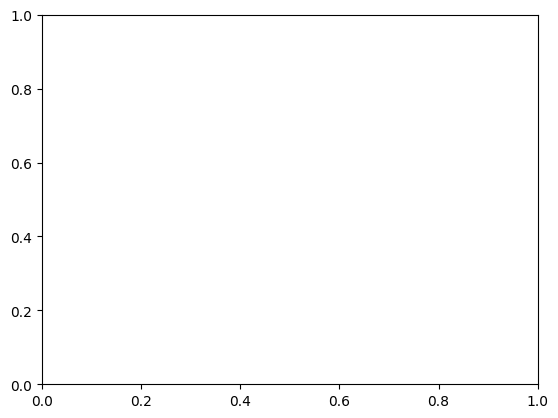

In [267]:
rolaser_diff.plot.density(label="RoLASER")
c_rolaser_diff.plot.density(label="c-RoLASER")
# add x axis label  
plt.xlabel('Difference in loss (loss_ugc_gold - loss_std_gold)')
# apply formatter to y axis to display thousands as K
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_yaxis))
# add legend
plt.legend()
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_034_jz/scores/loss_diff_density.pdf") 

### Correlation with sequence length

In [24]:
char_tokenizer = CustomTokenizer("char")
roberta_tokenizer = CustomTokenizer("roberta") 
spm_tokenizer = CustomTokenizer("spm")

In [ ]:
ref_file = FILES["rocsmt"]["laser"] 
src_file = FILES["rocsmt"]["roberta-student"]

In [32]:
tok_files_dataframe(char_tokenizer)

,tokenized line,corpus,sequence length
0,""" _EOW W e _EOW n o w _EOW h a v e _EOW 4 _EOW...",flores200,99
1,"D r _EOW . _EOW E h u d _EOW U r _EOW , _EOW p...",flores200,230
2,L i k e _EOW s o m e _EOW o t h e r _EOW e x p...,flores200,170
3,"O n _EOW M o n d a y _EOW , _EOW S a r a _EOW ...",flores200,322
4,"D a n i u s _EOW s a i d _EOW , _EOW "" _EOW R ...",flores200,183
...,...,...,...
4896,r t _EOW @ _EOW t w i t t b e t t y b u t t _E...,multilexnorm2021,136
4897,i s _EOW j a e j o o n g _EOW r e a l l y _EOW...,multilexnorm2021,52
4898,r t _EOW @ _EOW t o n y t h e t u r t l e e e ...,multilexnorm2021,108
4899,r t _EOW @ _EOW m i i l k k k _EOW : _EOW w h ...,multilexnorm2021,106


In [29]:
tok_files_dataframe(roberta_tokenizer)

,tokenized line,corpus,sequence length
0,""" We Ġnow Ġhave Ġ4 - month - old Ġmice Ġthat Ġ...",flores200,25
1,"Dr . ĠEh ud ĠUr , Ġprofessor Ġof Ġmedicine Ġat...",flores200,44
2,"Like Ġsome Ġother Ġexperts , Ġhe Ġis Ġskeptica...",flores200,31
3,"On ĠMonday , ĠSara ĠDani us , Ġpermanent Ġsecr...",flores200,60
4,"D ani us Ġsaid , Ġ"" Right Ġnow Ġwe Ġare Ġdoing...",flores200,37
...,...,...,...
4896,rt Ġ@ tw itt bet ty butt Ġ: Ġno Ġrelationship ...,multilexnorm2021,37
4897,is Ġj ae jo ong Ġreally Ġchange Ġhis Ġchar a Ġ...,multilexnorm2021,16
4898,rt Ġ@ ton y the t urtle ee Ġ: Ġover Ġhere Ġtry...,multilexnorm2021,35
4899,rt Ġ@ mi il kk k Ġ: Ġwhen Ġm r . Ġk r abs Ġsol...,multilexnorm2021,32


In [30]:
tok_files_dataframe(spm_tokenizer)

,tokenized line,corpus,sequence length
0,"▁"" W e ▁now ▁have ▁4- mon th - old ▁mi ce ▁tha...",flores200,32
1,"▁Dr . ▁Eh ud ▁Ur , ▁professor ▁of ▁medic ine ▁...",flores200,63
2,"▁Li ke ▁some ▁other ▁expert s , ▁he ▁is ▁ ske ...",flores200,48
3,"▁On ▁Mon day , ▁Sara ▁Dan ius , ▁permanent ▁se...",flores200,92
4,"▁Dan ius ▁said , ▁"" R ight ▁now ▁we ▁are ▁do i...",flores200,50
...,...,...,...
4896,▁ rt ▁@ t wit t bet ty but t ▁: ▁no ▁relation ...,multilexnorm2021,43
4897,▁is ▁ja ejo ong ▁really ▁change ▁his ▁char a ▁...,multilexnorm2021,15
4898,▁ rt ▁@ to ny the tur tle e e ▁: ▁over ▁here ▁...,multilexnorm2021,43
4899,▁ rt ▁@ mi il k kk ▁: ▁when ▁m r . ▁kra b s ▁s...,multilexnorm2021,43


In [87]:
cos_dist = {}
corpus = "rocsmt"
files = FILES[corpus]
model_names = MODEL_NAMES
model = "character-roberta-student"
print("Comparing LASER with", model_names[model])
ref_file = files["laser"]
src_file = files[model]
model_pair = f"{model_names[model]}_LASER"
X, data = get_visualization_dataframe(src_file, ref_file, model_pair, src_type=model_names[model], ref_type="LASER")
data["seq_len"] = file_seq_lengths(["laser", model], RAW_FILES[corpus])
n_sentences = X.shape[0]//2
cos_dist[model_pair] = paired_cosine_distances(X[:n_sentences,:], X[n_sentences:,:])
plot_visualization_data(data, plots_path, model_pair)

Comparing LASER with c-RoLASER


/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

<Figure size 624.75x500 with 0 Axes>

<Figure size 624.75x500 with 0 Axes>

In [144]:
data.describe()

,PCA dim 1,PCA dim 2,t-SNE dim 1,t-SNE dim 2,UMAP dim 1,UMAP dim 2,seq_len
count,3.844000e+03,3.844000e+03,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000
mean,2.381705e-08,1.151157e-07,0.728627,0.971634,7.872536,10.206622,49.213840
std,3.084261e-01,2.016001e-01,39.621719,37.784554,2.046288,1.615906,48.339641
min,-3.868888e-01,-3.007285e-01,-87.784462,-86.717583,4.146110,5.976264,1.000000
25%,-2.370180e-01,-1.576683e-01,-29.493250,-27.736765,6.231793,9.280321,17.000000
50%,-1.334030e-01,-4.316083e-02,-0.479358,0.288037,7.623292,10.347948,32.000000
75%,1.870254e-01,1.001430e-01,29.434695,28.843257,9.261320,11.347516,65.000000
max,8.369790e-01,7.325433e-01,92.460991,81.353401,12.207938,13.408525,399.000000


<AxesSubplot: xlabel='PCA dim 1', ylabel='PCA dim 2'>

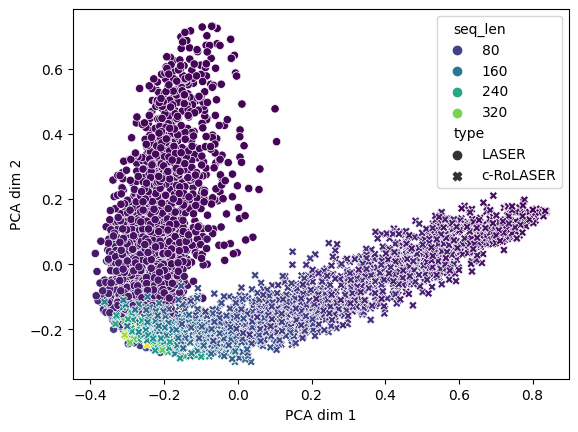

In [110]:
sns.scatterplot(data, x="PCA dim 1", y="PCA dim 2", hue="seq_len", style="type", palette="viridis")

<AxesSubplot: xlabel='PCA dim 2', ylabel='seq_len'>

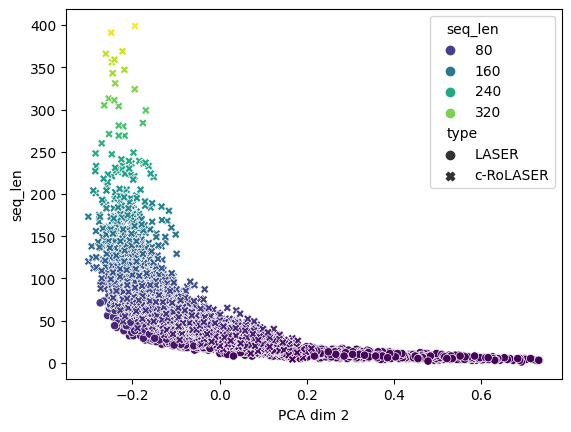

In [111]:
sns.scatterplot(data, x="PCA dim 2", y="seq_len", hue="seq_len", style="type", palette="viridis")

<AxesSubplot: xlabel='PCA dim 1', ylabel='seq_len'>

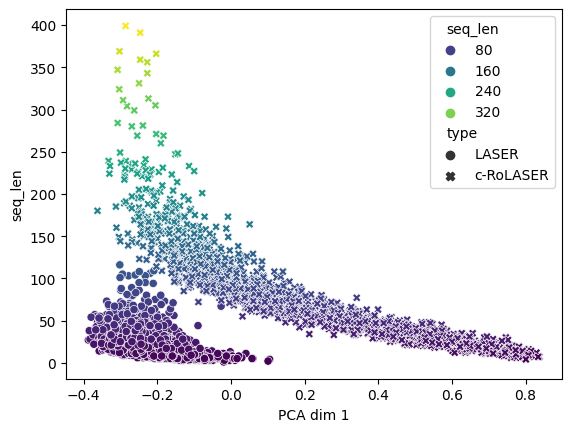

In [112]:
sns.scatterplot(data, x="PCA dim 1", y="seq_len", hue="seq_len", style="type", palette="viridis")

<AxesSubplot: xlabel='seq_len', ylabel='PCA dim 1'>

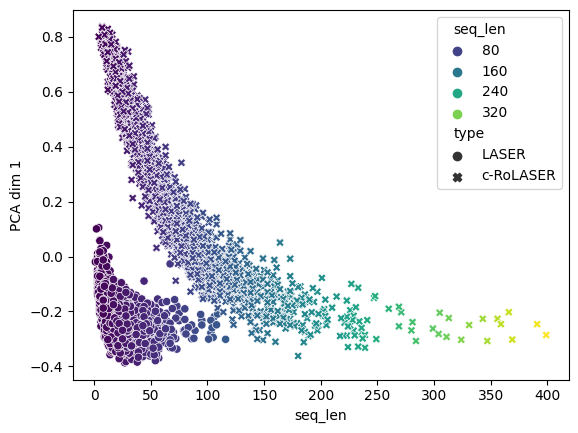

In [114]:
sns.scatterplot(data, y="PCA dim 1", x="seq_len", hue="seq_len", style="type", palette="viridis")

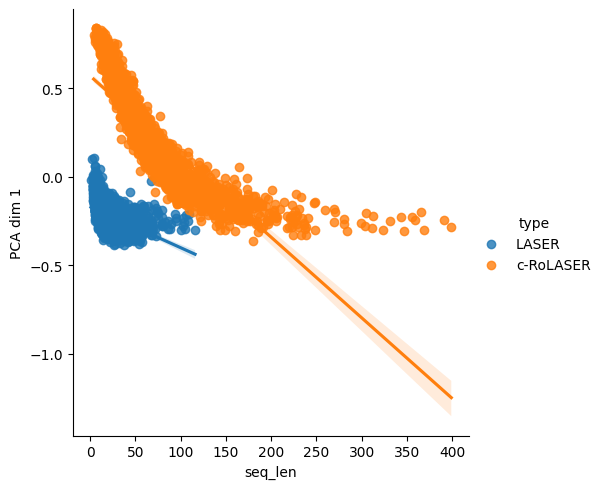

In [139]:
sns.lmplot(data=data, y="PCA dim 1", x="seq_len", hue="type")


<AxesSubplot: xlabel='seq_len', ylabel='PCA dim 2'>

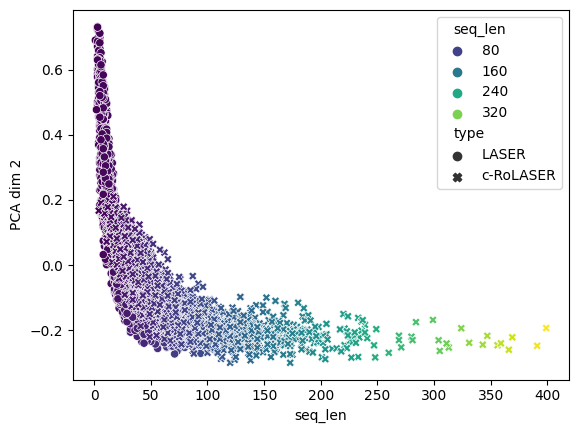

In [113]:
sns.scatterplot(data, y="PCA dim 2", x="seq_len", hue="seq_len", style="type", palette="viridis")

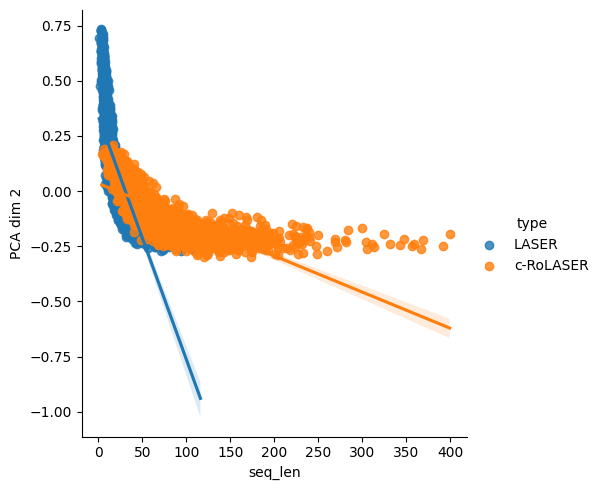

In [150]:
sns.lmplot(data=data, y="PCA dim 2", x="seq_len", hue="type")
